In [175]:
import os
import shutil
import hashlib
import random
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow as tf


from tensorflow.keras.models import Model ,load_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras import regularizers
from sklearn.metrics import classification_report, confusion_matrix

# Set a seed for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)


In [8]:
pip install kaggle


  Using cached kaggle-1.6.17.tar.gz (82 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105797 sha256=8ae8b7b27fa6c1cb3aa63000dc1c23bd9eafefec0285261dc5241e3101913a7d
  Stored in directory: c:\users\home\appdata\local\pip\cache\wheels\46\d2\26\84d0a1acdb9c6baccf7d28cf06962ec80529fe1ad938489983
Successfully built kaggle


In [14]:
!kaggle datasets list

401 - Unauthorized - Unauthenticated


In [16]:
!kaggle datasets files -d paultimothymooney/chest-xray-pneumonia

Next Page Token = CfDJ8D29UYyoxK9CvcInYb4_m_vL9QedCvTqrC_w8cIkoPcYfoAYSTnMN_VmxPOURNRTdiTR9dv5uI64VukJ26DfsQo
name                                                                 size  creationDate         
-------------------------------------------------------------------  ----  -------------------  
chest_xray/__MACOSX/._chest_xray                                     212B  2018-03-24 19:47:53  
chest_xray/__MACOSX/chest_xray/._.DS_Store                           212B  2018-03-24 19:47:53  
chest_xray/__MACOSX/chest_xray/._test                                212B  2018-03-24 19:47:53  
chest_xray/__MACOSX/chest_xray/._train                               212B  2018-03-24 19:47:53  
chest_xray/__MACOSX/chest_xray/test/._.DS_Store                      212B  2018-03-24 19:48:46  
chest_xray/__MACOSX/chest_xray/test/._NORMAL                         212B  2018-03-24 19:48:46  
chest_xray/__MACOSX/chest_xray/test/._PNEUMONIA                      212B  2018-03-24 19:48:46  
chest_xray/__MACO

In [18]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia -f chest_xray_pneumonia.csv

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
404 - Not Found - Not found


In [22]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia


Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other




  0%|          | 0.00/2.29G [00:00<?, ?B/s]
  0%|          | 1.00M/2.29G [00:00<24:47, 1.66MB/s]
  0%|          | 2.00M/2.29G [00:00<17:29, 2.34MB/s]
  0%|          | 3.00M/2.29G [00:01<18:01, 2.28MB/s]
  0%|          | 4.00M/2.29G [00:01<17:47, 2.30MB/s]
  0%|          | 5.00M/2.29G [00:02<18:49, 2.18MB/s]
  0%|          | 6.00M/2.29G [00:02<16:26, 2.49MB/s]
  0%|          | 7.00M/2.29G [00:02<14:30, 2.82MB/s]
  0%|          | 8.00M/2.29G [00:03<13:43, 2.98MB/s]
  0%|          | 9.00M/2.29G [00:03<13:57, 2.93MB/s]
  0%|          | 10.0M/2.29G [00:04<14:08, 2.89MB/s]
  0%|          | 11.0M/2.29G [00:04<14:32, 2.81MB/s]
  1%|          | 12.0M/2.29G [00:04<16:01, 2.55MB/s]
  1%|          | 13.0M/2.29G [00:05<18:05, 2.26MB/s]
  1%|          | 14.0M/2.29G [00:06<20:33, 1.99MB/s]
  1%|          | 15.0M/2.29G [00:06<21:19, 1.91MB/s]
  1%|          | 16.0M/2.29G [00:07<24:13, 1.68MB/s]
  1%|          | 17.0M/2.29G [00:08<26:36, 1.53MB/s]
  1%|          | 18.0M/2.29G [00:09<28:02, 1.45MB/s]
 

In [30]:
import os
os.listdir()




['.ipynb_checkpoints',
 'chest-xray-pneumonia.zip',
 'import os.py',
 'projet_ML.ipynb',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 'Untitled2.ipynb']

In [34]:
import zipfile
with zipfile.ZipFile("chest-xray-pneumonia.zip", 'r') as zip_ref:
    zip_ref.extractall("extracted_dataset")

In [48]:
train_dir = r'extracted_dataset\chest_xray\chest_xray\train'
test_dir = r'extracted_dataset\chest_xray\chest_xray\test'
val_dir = r'extracted_dataset\chest_xray\chest_xray\val'


Found 5216 images belonging to 2 classes.


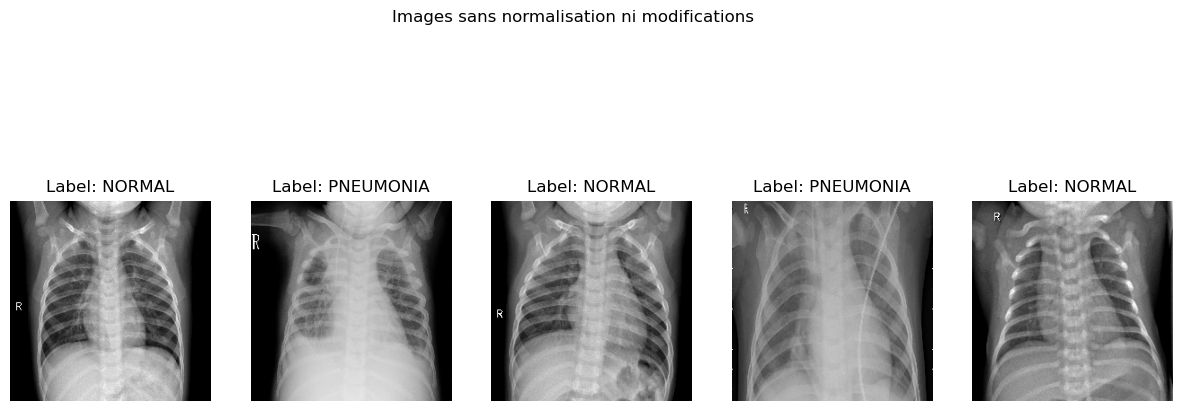

In [50]:
datagen = ImageDataGenerator()

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary'
)


sample_batch = next(train_generator)
sample_images, sample_labels = sample_batch


num_images = 5
plt.figure(figsize=(15, 6))

for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(sample_images[i].astype('uint8'))
    plt.title(f"Label: {'PNEUMONIA' if sample_labels[i] == 1 else 'NORMAL'}")
    plt.axis('off')

plt.suptitle('Images sans normalisation ni modifications')
plt.show()

Found 5216 images belonging to 2 classes.


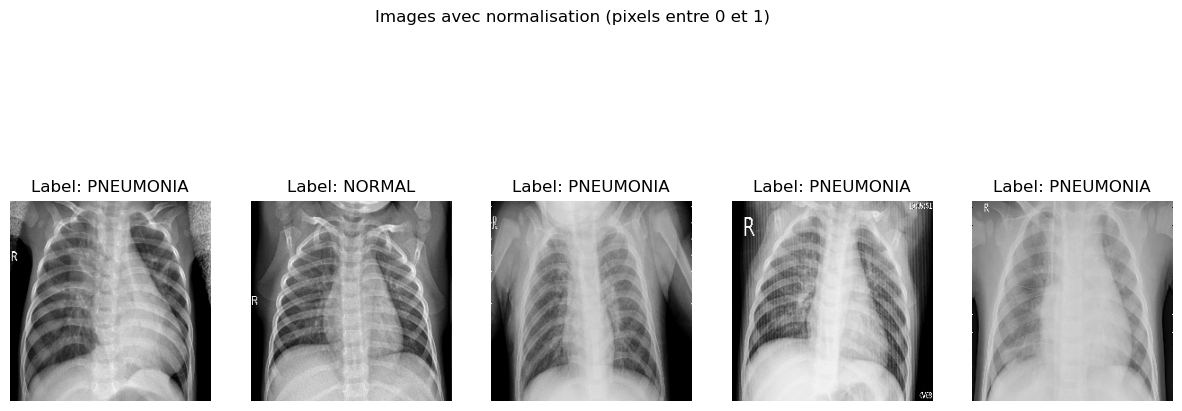

In [52]:
datagen = ImageDataGenerator(rescale=1.0/255)  # Normalisation des pixels entre 0 et 1

# Générer un batch d'images depuis le dossier d'entraînement
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary'
)

# Obtenir un lot d'images normalisées
sample_batch = next(train_generator)
sample_images, sample_labels = sample_batch

# Afficher les images normalisées
num_images = 5
plt.figure(figsize=(15, 6))

for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(sample_images[i])  # Les valeurs normalisées sont entre 0 et 1, plt.imshow les affiche correctement
    plt.title(f"Label: {'PNEUMONIA' if sample_labels[i] == 1 else 'NORMAL'}")
    plt.axis('off')

plt.suptitle('Images avec normalisation (pixels entre 0 et 1)')
plt.show()

In [54]:
labels = ['NORMAL', 'PNEUMONIA']


for label in labels:
    path = os.path.join(train_dir, label)
    num_images = len(os.listdir(path))
    print(f"Classe '{label}' : {num_images} images")

Classe 'NORMAL' : 1342 images
Classe 'PNEUMONIA' : 3876 images


In [77]:
normal_dir = r'extracted_dataset\chest_xray\chest_xray\train\NORMAL'
augmented_dir =  r'extracted_dataset\chest_xray\chest_xray\train\NORMAL_augmented'


os.makedirs(augmented_dir, exist_ok=True)


datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True
)


for filename in os.listdir(normal_dir):
    img_path = os.path.join(normal_dir, filename)
    img = Image.open(img_path).convert('RGB')  # Convertir en RGB si nécessaire
    img = img.resize((224, 224))  # Redimensionner l'image si nécessaire
    x = np.array(img)  # Convertir en tableau numpy
    x = x.reshape((1,) + x.shape)  # Redimensionner en 4 dimensions: (1, hauteur, largeur, canaux)

    # Générer 2 à 3 images augmentées par image d'origine
    i = 0
    for batch in datagen.flow(x, batch_size=1, save_to_dir=augmented_dir, save_prefix='aug', save_format='jpeg'):
        i += 1
        if i > 2:  # Limiter le nombre d'augmentations
            break



print("terminer")




terminer


In [79]:
labels = ['NORMAL', 'PNEUMONIA']

# Compte les images par classe
for label in labels:
    path = os.path.join(train_dir, label)
    num_images = len(os.listdir(path))
    print(f"Classe '{label}' : {num_images} images")

Classe 'NORMAL' : 1341 images
Classe 'PNEUMONIA' : 3875 images


In [81]:
# Chemin vers le dossier des images augmentées
augmented_dir = r'extracted_dataset\chest_xray\chest_xray\train\NORMAL_augmented'

# Compter le nombre d'images
num_augmented_images = len(os.listdir(augmented_dir))
print(f"Nombre d'images dans le dossier 'NORMAL_augmented': {num_augmented_images}")

Nombre d'images dans le dossier 'NORMAL_augmented': 5496


In [85]:
import shutil
normal_dir = r'extracted_dataset\chest_xray\chest_xray\train\NORMAL'
for filename in os.listdir(augmented_dir):
    src_path = os.path.join(augmented_dir, filename)
    dst_path = os.path.join(normal_dir, filename)
    shutil.move(src_path, dst_path)

print("Les images augmentées ont été déplacées dans le dossier 'NORMAL'.")

Les images augmentées ont été déplacées dans le dossier 'NORMAL'.


In [87]:
num_total_images = len(os.listdir(normal_dir))
print(f"Nombre total d'images dans le dossier 'NORMAL' après augmentation : {num_total_images}")

Nombre total d'images dans le dossier 'NORMAL' après augmentation : 6837


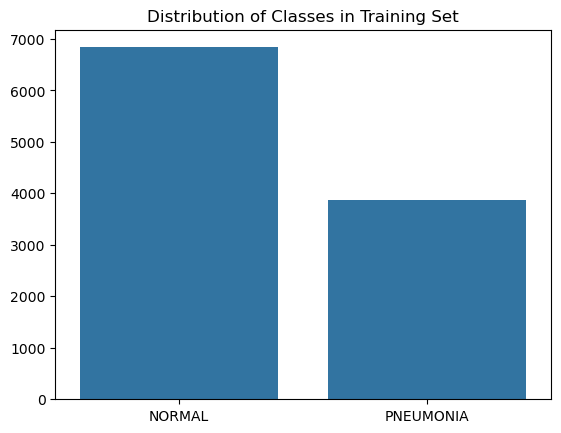

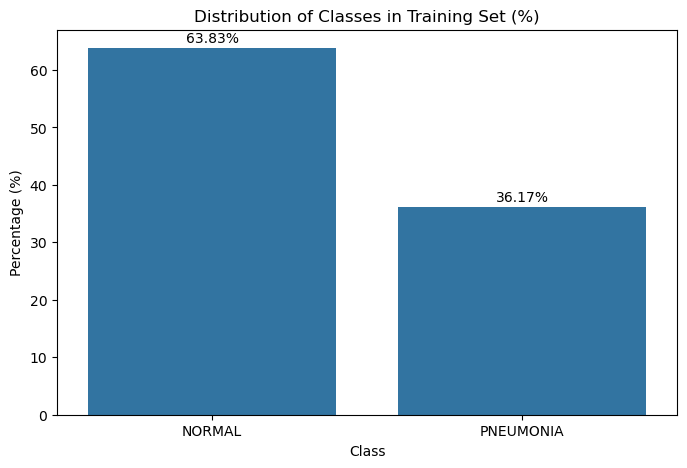

In [93]:
labels = ['NORMAL', 'PNEUMONIA']
train_counts = [len(os.listdir(f"{train_dir}/{label}")) for label in labels]

sns.barplot(x=labels, y=train_counts)
plt.title('Distribution of Classes in Training Set')


total_count = sum(train_counts)
percentages = [(count / total_count) * 100 for count in train_counts]


plt.figure(figsize=(8, 5))
sns.barplot(x=labels, y=percentages)
plt.title('Distribution of Classes in Training Set (%)')
plt.ylabel('Percentage (%)')
plt.xlabel('Class')


for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center')
plt.show()

In [95]:
# Chemin du dossier contenant les images "PNEUMONIA"
pneumonia_dir = r'extracted_dataset\chest_xray\chest_xray\train\PNEUMONIA'
augmented_dir = r'extracted_dataset\chest_xray\chest_xray\train\PNEUMONIA_augmented'

# Créer un dossier pour stocker les images augmentées
os.makedirs(augmented_dir, exist_ok=True)

# Configurer le générateur d'images avec des transformations
datagen = ImageDataGenerator(
    rescale=1.0/255,           # Normalisation des pixels
    rotation_range=20,         # Rotation aléatoire
    width_shift_range=0.2,     # Décalage horizontal
    height_shift_range=0.2,    # Décalage vertical
    shear_range=0.15,          # Cisaillement
    zoom_range=0.15,           # Zoom
    horizontal_flip=True,      # Retournement horizontal
    fill_mode='nearest'        # Remplissage des pixels manquants
)

# Charger et augmenter les images de la classe "PNEUMONIA"
for filename in os.listdir(pneumonia_dir):
    img_path = os.path.join(pneumonia_dir, filename)
    img = Image.open(img_path).convert('RGB')  # Convertir en RGB si nécessaire
    img = img.resize((224, 224))  # Redimensionner l'image si nécessaire
    x = np.array(img)  # Convertir en tableau numpy
    x = x.reshape((1,) + x.shape)  # Redimensionner en 4D: (1, hauteur, largeur, canaux)

    # Générer 2 à 3 images augmentées par image d'origine
    i = 0
    for batch in datagen.flow(x, batch_size=1, save_to_dir=augmented_dir, save_prefix='aug', save_format='jpeg'):
        i += 1
        if i > 2:  # Limiter le nombre d'images générées par image originale
            break

In [97]:
# Compter le nombre d'images
num_augmented_images = len(os.listdir(augmented_dir))
print(f"Nombre d'images dans le dossier 'PNEUMONIA_augmented': {num_augmented_images}")

Nombre d'images dans le dossier 'PNEUMONIA_augmented': 6926


In [99]:
for filename in os.listdir(augmented_dir):
    src_path = os.path.join(augmented_dir, filename)
    dst_path = os.path.join(pneumonia_dir, filename)
    shutil.move(src_path, dst_path)

print("Les images augmentées ont été déplacées dans le dossier 'PNEUMONIA'.")

Les images augmentées ont été déplacées dans le dossier 'PNEUMONIA'.


In [109]:
um_total_images = len(os.listdir(pneumonia_dir))
print(f"Nombre total d'images dans le dossier 'PNEUMONIA' après augmentation : {um_total_images}")

Nombre total d'images dans le dossier 'PNEUMONIA' après augmentation : 10801


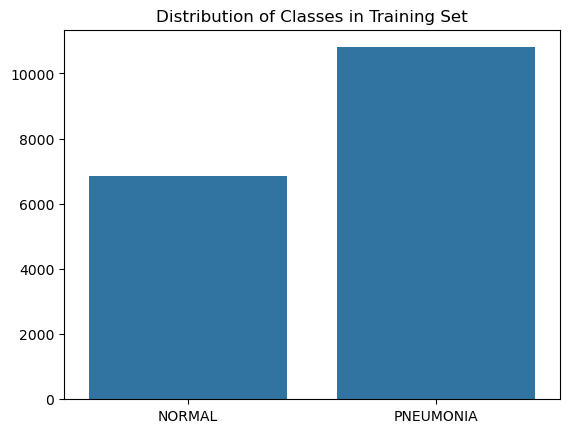

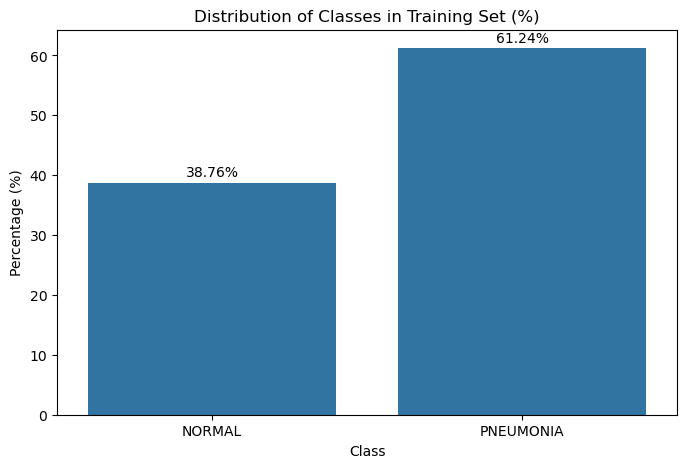

In [119]:
labels = ['NORMAL', 'PNEUMONIA']
train_counts = [len(os.listdir(f"{train_dir}/{label}")) for label in labels]

sns.barplot(x=labels, y=train_counts)
plt.title('Distribution of Classes in Training Set')


total_count = sum(train_counts)
percentages = [(count / total_count) * 100 for count in train_counts]


plt.figure(figsize=(8, 5))
sns.barplot(x=labels, y=percentages)
plt.title('Distribution of Classes in Training Set (%)')
plt.ylabel('Percentage (%)')
plt.xlabel('Class')


for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center')
plt.show()

In [123]:
import random
def calculate_hash(image_path):

    hash_md5 = hashlib.md5()
    with open(image_path, "rb") as f:

        for chunk in iter(lambda: f.read(4096), b""):
            hash_md5.update(chunk)
    return hash_md5.hexdigest()

def remove_duplicates(image_dir):

    seen_hashes = {}
    duplicates = []


    for image in os.listdir(image_dir):
        image_path = os.path.join(image_dir, image)


        image_hash = calculate_hash(image_path)

        if image_hash in seen_hashes:

            duplicates.append(image_path)
        else:
            seen_hashes[image_hash] = image_path


    for duplicate in duplicates:
        os.remove(duplicate)
        print(f"Supprimée : {duplicate}")


    return len(duplicates)

def reduce_images(image_dir, target_count):

    remaining_images = os.listdir(image_dir)


    num_to_remove = len(remaining_images) - target_count

    if num_to_remove > 0:

        images_to_remove = random.sample(remaining_images, num_to_remove)
        for image in images_to_remove:
            image_path = os.path.join(image_dir, image)
            os.remove(image_path)
            print(f"Supprimée (aléatoire) : {image_path}")
    else:
        print("Le nombre d'images est déjà inférieur ou égal à la cible.")


duplicates_removed = remove_duplicates(pneumonia_dir)
print(f"{duplicates_removed} images dupliquées ont été supprimées.")

reduce_images(pneumonia_dir, target_count=6186)

0 images dupliquées ont été supprimées.
Supprimée (aléatoire) : extracted_dataset\chest_xray\chest_xray\train\PNEUMONIA\person532_virus_1054.jpeg
Supprimée (aléatoire) : extracted_dataset\chest_xray\chest_xray\train\PNEUMONIA\aug_0_7734.jpeg
Supprimée (aléatoire) : extracted_dataset\chest_xray\chest_xray\train\PNEUMONIA\aug_0_3783.jpeg
Supprimée (aléatoire) : extracted_dataset\chest_xray\chest_xray\train\PNEUMONIA\person1405_bacteria_3566.jpeg
Supprimée (aléatoire) : extracted_dataset\chest_xray\chest_xray\train\PNEUMONIA\aug_0_7542.jpeg
Supprimée (aléatoire) : extracted_dataset\chest_xray\chest_xray\train\PNEUMONIA\aug_0_7211.jpeg
Supprimée (aléatoire) : extracted_dataset\chest_xray\chest_xray\train\PNEUMONIA\aug_0_4797.jpeg
Supprimée (aléatoire) : extracted_dataset\chest_xray\chest_xray\train\PNEUMONIA\person605_bacteria_2467.jpeg
Supprimée (aléatoire) : extracted_dataset\chest_xray\chest_xray\train\PNEUMONIA\aug_0_9145.jpeg
Supprimée (aléatoire) : extracted_dataset\chest_xray\chest_

In [125]:
for label in labels:
    path = os.path.join(train_dir, label)
    num_images = len(os.listdir(path))
    print(f"Classe '{label}' : {num_images} images")

Classe 'NORMAL' : 6837 images
Classe 'PNEUMONIA' : 6186 images


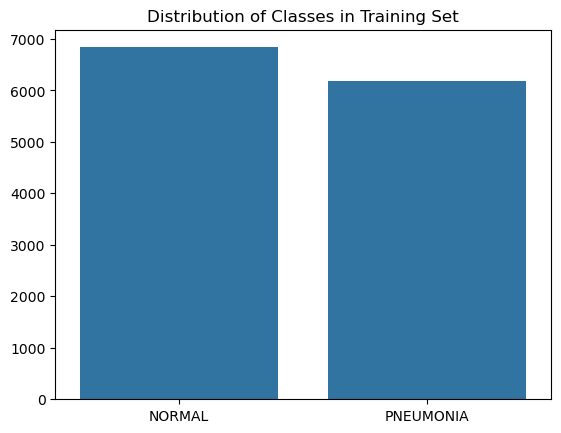

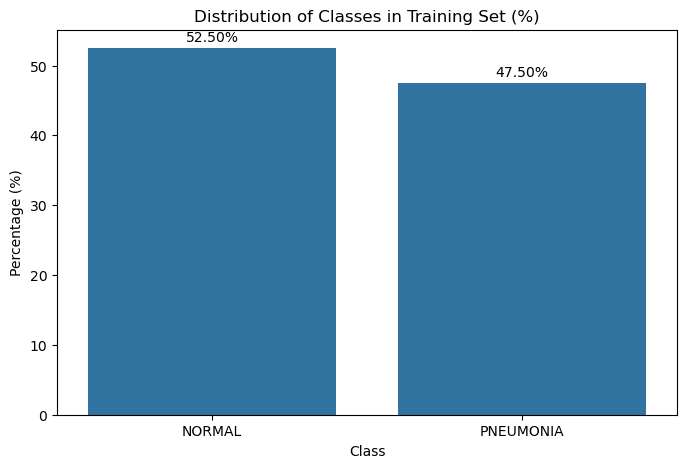

In [127]:
labels = ['NORMAL', 'PNEUMONIA']
train_counts = [len(os.listdir(f"{train_dir}/{label}")) for label in labels]

sns.barplot(x=labels, y=train_counts)
plt.title('Distribution of Classes in Training Set')


total_count = sum(train_counts)
percentages = [(count / total_count) * 100 for count in train_counts]


plt.figure(figsize=(8, 5))
sns.barplot(x=labels, y=percentages)
plt.title('Distribution of Classes in Training Set (%)')
plt.ylabel('Percentage (%)')
plt.xlabel('Class')


for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center')
plt.show()

In [129]:
dataset_path =r'extracted_dataset\chest_xray\chest_xray\train'
categories =['NORMAL', 'PNEUMONIA']

Total NORMAL images: 6837
Total PNEUMONIA images: 6186


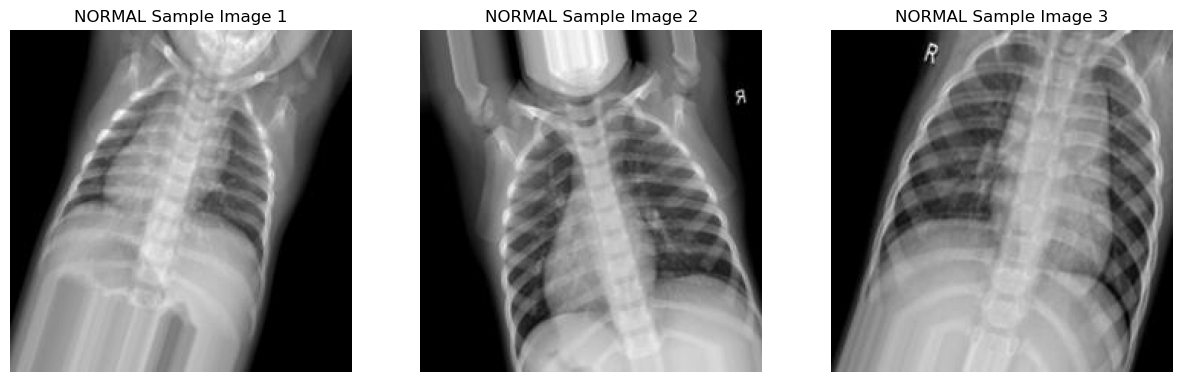

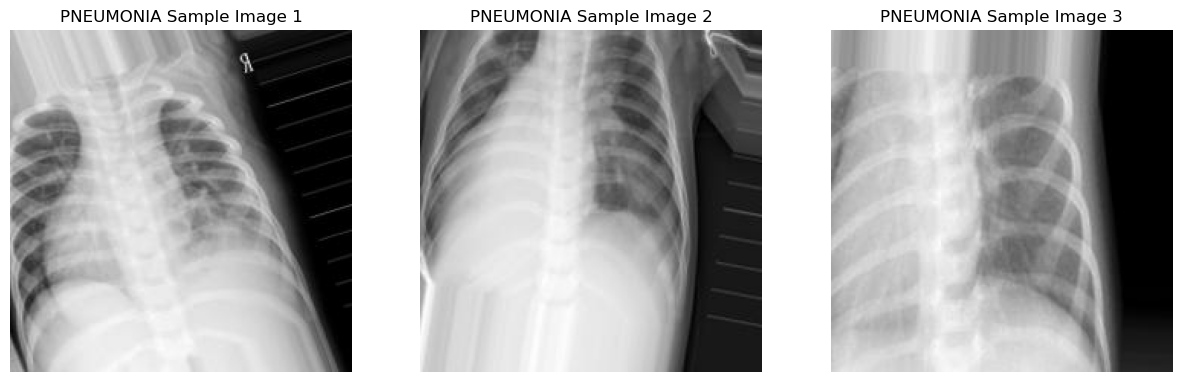

In [133]:
# Define paths to the image categories
# Update this to your dataset path
# Initialize a dictionary to store the count of images for each category
import cv2
image_counts = {}

# Count images in each folder
for category in categories:
    category_path = os.path.join(dataset_path, category)
    image_counts[category] = len(os.listdir(category_path))

# Print the total number of images in each category
for category, count in image_counts.items():
    print(f"Total {category} images: {count}")

# Function to display multiple sample images from a category
def display_samples(image_paths, title, num_samples=3):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        img_path = image_paths[i]
        img = cv2.imread(img_path)  # Read the image
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB format
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img_rgb)
        plt.title(f"{title} {i + 1}")
        plt.axis('off')
    plt.show()

# Get and display 3 sample images from each category
for category in categories:
    category_path = os.path.join(dataset_path, category)
    images_list = os.listdir(category_path)
    display_samples([os.path.join(category_path, img) for img in images_list[:3]], f"{category} Sample Image")

In [137]:
data_dir=r'extracted_dataset\chest_xray\chest_xray'
target_folder=r'train'
filepath=[]
labels=[]
all_folder_path = os.path.join(data_dir, target_folder)

if os.path.isdir(all_folder_path):
    filelist = os.listdir(all_folder_path)
    for f in filelist:
        fpath = os.path.join(all_folder_path, f)
        fipath=os.listdir(fpath)
        for image in fipath:
            path = os.path.join(fpath, image)
            filepath.append(path)
            labels.append(f)

f_series = pd.Series(filepath, name='filepath')
l_series = pd.Series(labels, name='labels')
df = pd.concat([f_series, l_series], axis=1)
# Display the first few rows
print(df.head())

# Check data types
print(df.dtypes)

# Check for missing values
print(df.isnull().sum())

# Show dataset statistics
print(df.describe())

                                            filepath  labels
0  extracted_dataset\chest_xray\chest_xray\train\...  NORMAL
1  extracted_dataset\chest_xray\chest_xray\train\...  NORMAL
2  extracted_dataset\chest_xray\chest_xray\train\...  NORMAL
3  extracted_dataset\chest_xray\chest_xray\train\...  NORMAL
4  extracted_dataset\chest_xray\chest_xray\train\...  NORMAL
filepath    object
labels      object
dtype: object
filepath    0
labels      0
dtype: int64
                                                 filepath  labels
count                                               13023   13023
unique                                              13023       2
top     extracted_dataset\chest_xray\chest_xray\train\...  NORMAL
freq                                                    1    6837


In [140]:
df

,filepath,labels
0,extracted_dataset\chest_xray\chest_xray\train\...,NORMAL
1,extracted_dataset\chest_xray\chest_xray\train\...,NORMAL
2,extracted_dataset\chest_xray\chest_xray\train\...,NORMAL
3,extracted_dataset\chest_xray\chest_xray\train\...,NORMAL
4,extracted_dataset\chest_xray\chest_xray\train\...,NORMAL
...,...,...
13018,extracted_dataset\chest_xray\chest_xray\train\...,PNEUMONIA
13019,extracted_dataset\chest_xray\chest_xray\train\...,PNEUMONIA
13020,extracted_dataset\chest_xray\chest_xray\train\...,PNEUMONIA
13021,extracted_dataset\chest_xray\chest_xray\train\...,PNEUMONIA


In [150]:
counts=df['labels'].value_counts()
print(counts)

labels
NORMAL       6837
PNEUMONIA    6186
Name: count, dtype: int64


C:\Users\HOME\AppData\Local\Temp\ipykernel_76200\1732320191.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=counts.index, y=counts.values, palette=palette)


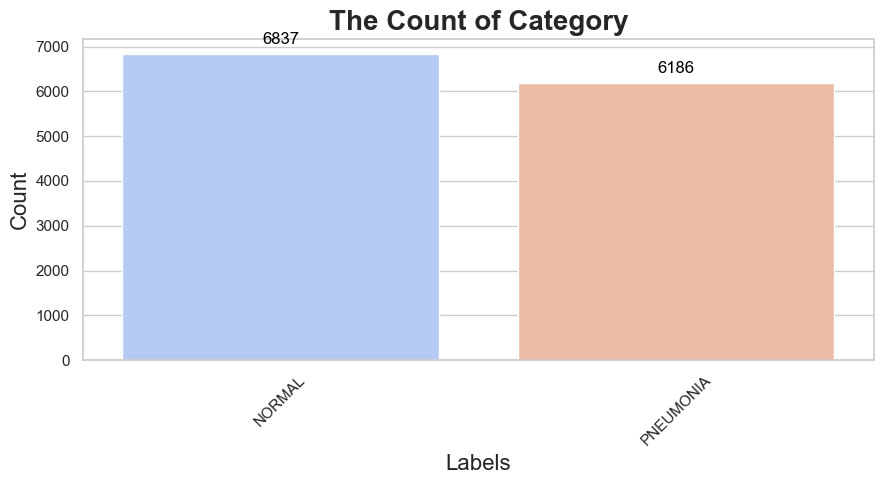

In [155]:
# Set the style and color palette
sns.set(style="whitegrid")
palette = sns.color_palette("coolwarm", n_colors=len(counts))

# Create the bar plot
plt.figure(figsize=(9, 5))
bar_plot = sns.barplot(x=counts.index, y=counts.values, palette=palette)

# Add title and labels with custom font sizes
plt.title('The Count of Category', fontsize=20, fontweight='bold')
plt.xlabel('Labels', fontsize=16)
plt.ylabel('Count', fontsize=16)

# Add value annotations on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom',
                      fontsize=12, color='black',
                      xytext=(0, 5),
                      textcoords='offset points')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [159]:
from sklearn.model_selection import train_test_split
strat=df['labels']
train_df ,dummy_df=train_test_split(df,test_size=0.3,random_state=42,stratify=strat)
strate=dummy_df['labels']
valid_df,test_df=train_test_split(dummy_df,test_size=0.5,random_state=42,stratify=strate)

In [161]:
print('shape of train =',train_df.shape)
print('shape of valid =',valid_df.shape)
print('shape of test =',test_df.shape)

shape of train = (9116, 2)
shape of valid = (1953, 2)
shape of test = (1954, 2)


In [163]:
batch_size = 64
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe(train_df, x_col= 'filepath', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe(valid_df, x_col= 'filepath', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                        color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe(test_df, x_col= 'filepath', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 9116 validated image filenames belonging to 2 classes.
Found 1953 validated image filenames belonging to 2 classes.
Found 1954 validated image filenames belonging to 2 classes.


In [165]:
folders = os.listdir(dataset_path)
num_classes = len(folders)
print(num_classes)

4


In [179]:
from tensorflow.keras.applications import ResNet101
# Build the model using ResNet101
base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model for multi-class classification
model3 = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(64, activation='relu'),
    Dropout(0.25),
    Dense(2, activation='softmax')  # Change to 2 classes with softmax activation
])

# Compile the model with Adamax optimizer
optimizer = Adamax(learning_rate=0.002)  # You can adjust the learning rate
model3.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])  # Change loss to categorical_crossentropy

In [181]:
# Define the early stopping and model checkpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_checkpoint = ModelCheckpoint(
    'best_model.keras',  # Filepath to save the model
    monitor='val_loss',  # Metric to monitor
    save_best_only=True,  # Save only the best model
    verbose=1  # Verbosity mode
)


# Fit the model with both callbacks
history = model3.fit(
     train_gen,
     epochs=50,
     validation_data=valid_gen,
     shuffle=False,
     callbacks=[early_stopping, model_checkpoint],
     validation_steps=None
)

C:\Users\HOME\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.8155 - loss: 6.7028 
Epoch 1: val_loss improved from inf to 0.21653, saving model to best_model.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 1944s 13s/step - accuracy: 0.8159 - loss: 6.6754 - val_accuracy: 0.9319 - val_loss: 0.2165
Epoch 2/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.9115 - loss: 0.5152 
Epoch 2: val_loss improved from 0.21653 to 0.16108, saving model to best_model.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 1856s 13s/step - accuracy: 0.9115 - loss: 0.5147 - val_accuracy: 0.9493 - val_loss: 0.1611
Epoch 3/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.9283 - loss: 0.2797 
Epoch 3: val_loss improved from 0.16108 to 0.14511, saving model to best_model.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 1823s 13s/step - accuracy: 0.9283 - loss: 0.2796 - val_accuracy: 0.9560 - val_loss: 0.1451
Epoch 4/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.9447 - loss: 0.2034 
Epoch 4: val_loss improved from 0.14511 t

In [185]:
!pip install pydot

In [191]:
tf.keras.utils.plot_model(model3,show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [195]:
!choco install graphviz


'choco' n’est pas reconnu en tant que commande interne
ou externe, un programme exécutable ou un fichier de commandes.


In [197]:
# Load the best model from the checkpoint
best_model = load_model('best_model.keras')

# Evaluate the model on the test dataset
test_loss, test_accuracy = best_model.evaluate(test_gen, verbose=2)

# Print the evaluation results
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

C:\Users\HOME\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/31 - 81s - 3s/step - accuracy: 0.9734 - loss: 0.1039
Test Loss: 0.1039
Test Accuracy: 0.9734


In [199]:
# Evaluate the best model on the test set
test_loss, test_accuracy = model3.evaluate(test_gen)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

31/31 ━━━━━━━━━━━━━━━━━━━━ 78s 3s/step - accuracy: 0.9754 - loss: 0.0926
Test Loss: 0.1039
Test Accuracy: 0.97


31/31 ━━━━━━━━━━━━━━━━━━━━ 103s 3s/step


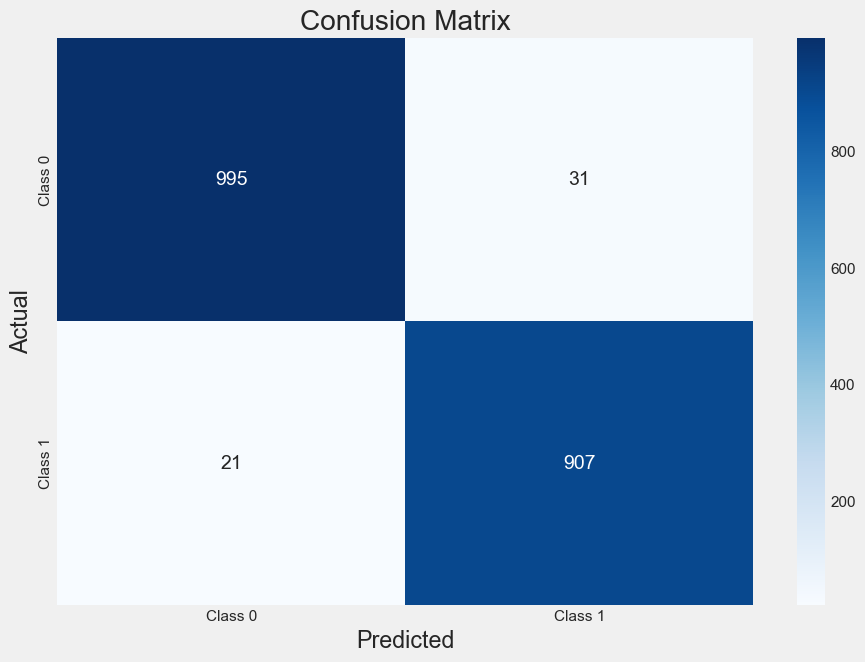

              precision    recall  f1-score   support

     Class 0       0.98      0.97      0.97      1026
     Class 1       0.97      0.98      0.97       928

    accuracy                           0.97      1954
   macro avg       0.97      0.97      0.97      1954
weighted avg       0.97      0.97      0.97      1954



In [241]:
# Make predictions on the test set using the test generator
y_pred_prob = best_model.predict(test_gen)  # Get predicted probabilities
y_pred_classes = np.argmax(y_pred_prob, axis=1)  # Get the predicted class labels

# Get the true labels from the generator
y_true = test_gen.classes  # True labels

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
class_report = classification_report(y_true, y_pred_classes, target_names=["Class 0", "Class 1"])
print(class_report)

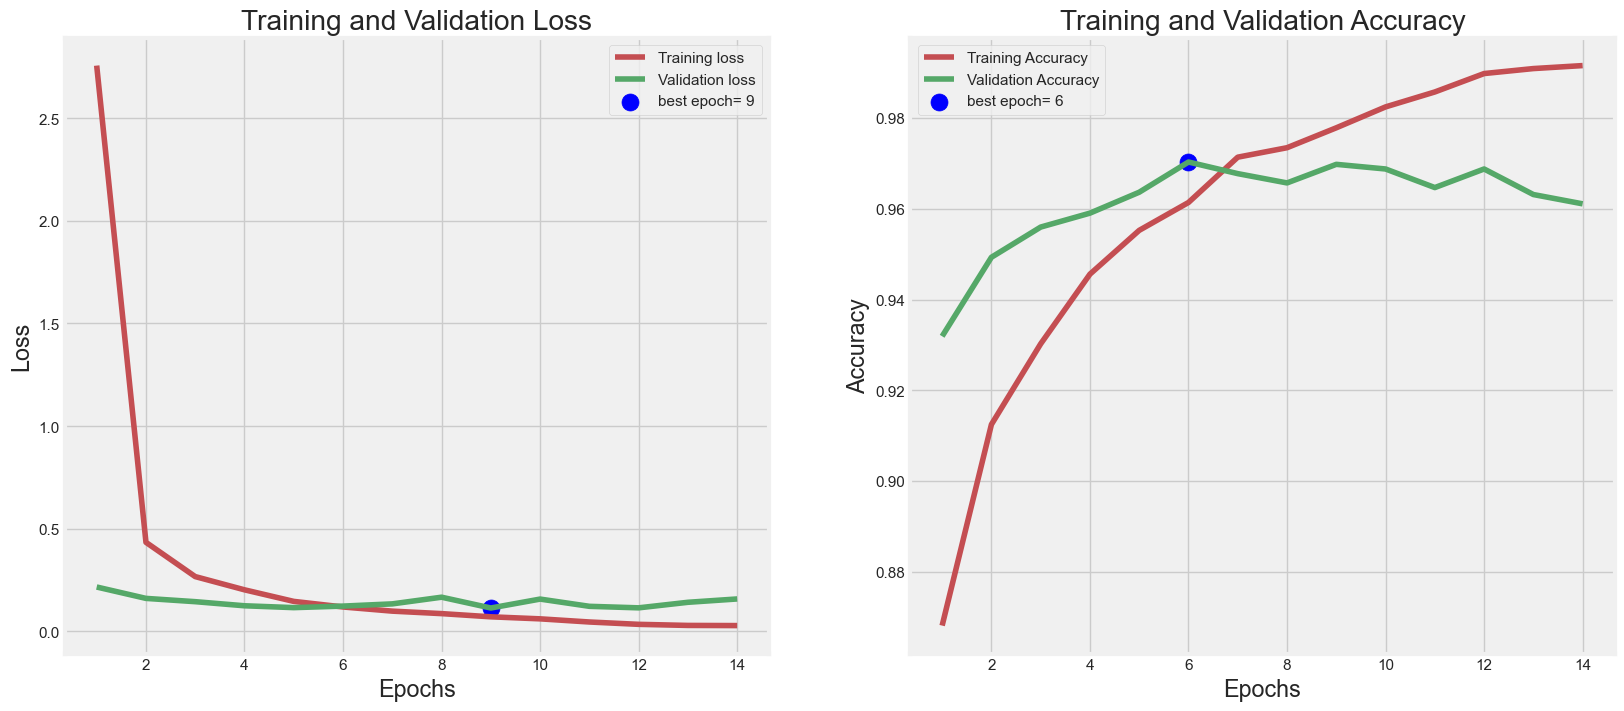

In [205]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [209]:
model3.save('projet_ML(PNEUMONIA).keras')


In [3]:
from tensorflow.keras.models import load_model

model = load_model('projet_ML(PNEUMONIA).keras')

Total NORMAL images: 8
Total PNEUMONIA images: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 936ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 803ms/step


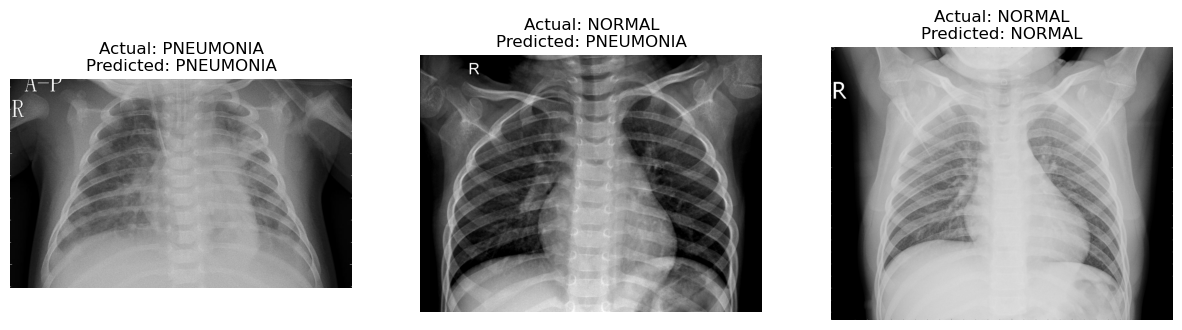

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 892ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 713ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 739ms/step


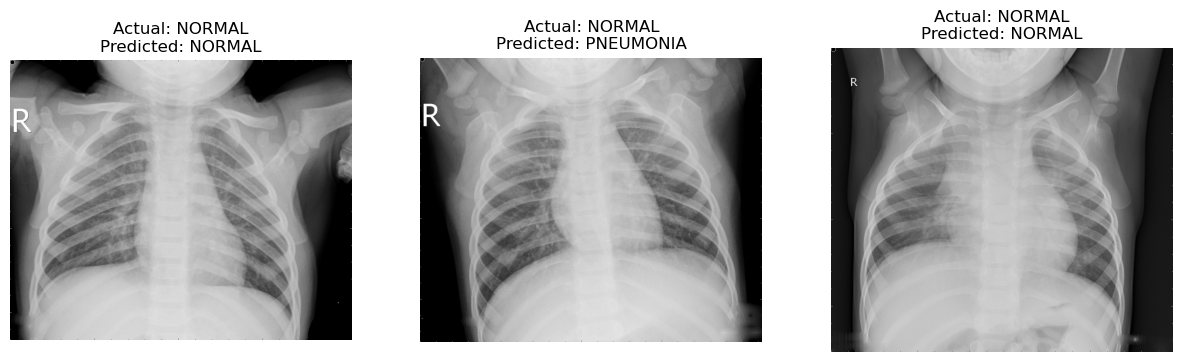

In [7]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define paths to the image categories
# Update this to your dataset path
dataset_path =r'extracted_dataset\chest_xray\val' # Change this to your dataset path
categories = ['NORMAL','PNEUMONIA']
num_classes = len(categories)

# Initialize lists to store image paths and labels
image_paths = []
actual_labels = []

# Count images in each folder and prepare paths and labels
for index, category in enumerate(categories):
    category_path = os.path.join(dataset_path, category)
    images_list = os.listdir(category_path)
    image_count = len(images_list)
    print(f"Total {category} images: {image_count}")

    # Extend the lists with image paths and corresponding labels
    image_paths.extend([os.path.join(category_path, img) for img in images_list])
    actual_labels.extend([index] * image_count)  # Assign labels based on the category index

# Function to display multiple sample images from a category with predictions
def display_samples(image_paths, actual_labels, model, num_samples=3):
    selected_indices = np.random.choice(len(image_paths), num_samples, replace=False)
    plt.figure(figsize=(15, 5))

    for i, idx in enumerate(selected_indices):
        img_path = image_paths[idx]
        img = cv2.imread(img_path)  # Read the image
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB format

        # Prepare the image for prediction
        img_resized = cv2.resize(img_rgb, (224, 224))  # Resize for model input
        img_array = np.expand_dims(img_resized, axis=0)  # Add batch dimension

        # Predict the label
        prediction = model.predict(img_array)
        predicted_label = np.argmax(prediction, axis=-1)[0]  # Get predicted class index
        actual_label = actual_labels[idx]  # Actual label

        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img_rgb)
        plt.title(f"Actual: {categories[actual_label]}\nPredicted: {categories[predicted_label]}")
        plt.axis('off')
    plt.show()

# Display 3 random sample images from each category
for category in categories:
    display_samples(image_paths, actual_labels, model)

Total NORMAL images: 8
Total PNEUMONIA images: 8
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
Actual: NORMAL
Predicted: NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
Actual: NORMAL
Predicted: NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step
Actual: NORMAL
Predicted: PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 715ms/step
Actual: NORMAL
Predicted: NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 850ms/step
Actual: NORMAL
Predicted: NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 880ms/step
Actual: NORMAL
Predicted: PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 926ms/step
Actual: NORMAL
Predicted: PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 801ms/step
Actual: NORMAL
Predicted: NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 757ms/step
Actual: PNEUMONIA
Predicted: PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 917ms/step
Actual: PNEUMONIA
Predicted: PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 733ms/step
Actual: PNEUMONIA
Predicted: PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step
Actual: PNEUMONIA
Predicted: PNEUMONIA

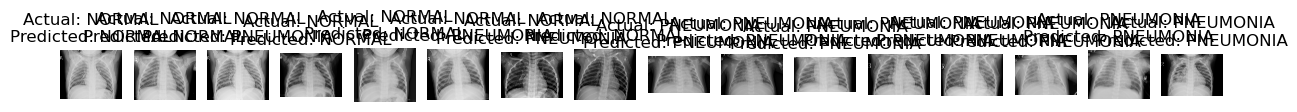

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 806ms/step
Actual: NORMAL
Predicted: NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step
Actual: NORMAL
Predicted: NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step
Actual: NORMAL
Predicted: PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 821ms/step
Actual: NORMAL
Predicted: NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 719ms/step
Actual: NORMAL
Predicted: NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 829ms/step
Actual: NORMAL
Predicted: PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step
Actual: NORMAL
Predicted: PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 773ms/step
Actual: NORMAL
Predicted: NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 743ms/step
Actual: PNEUMONIA
Predicted: PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 794ms/step
Actual: PNEUMONIA
Predicted: PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 729ms/step
Actual: PNEUMONIA
Predicted: PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 776ms/step
Actual: PNEUMONIA
Predicted: PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 736ms/step
Actual: P

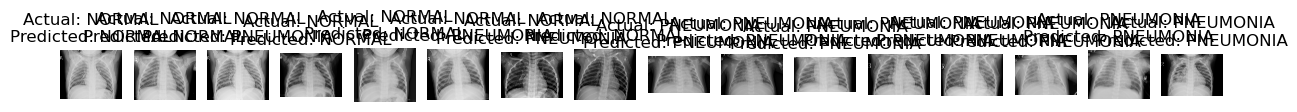

In [30]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define paths to the image categories
# Update this to your dataset path
dataset_path =r'extracted_dataset\chest_xray\val' # Change this to your dataset path
categories = ['NORMAL','PNEUMONIA']
num_classes = len(categories)

# Initialize lists to store image paths and labels
image_paths = []
actual_labels = []

# Count images in each folder and prepare paths and labels
for index, category in enumerate(categories):
    category_path = os.path.join(dataset_path, category)
    images_list = os.listdir(category_path)
    image_count = len(images_list)
    print(f"Total {category} images: {image_count}")

    # Extend the lists with image paths and corresponding labels
    image_paths.extend([os.path.join(category_path, img) for img in images_list])
    actual_labels.extend([index] * image_count)  # Assign labels based on the category index

# Function to display multiple sample images from a category with predictions
def display_samples(image_paths, actual_labels, model, num_samples=16):
    selected_indices = [i for i in range(16)]
    print(selected_indices)
    plt.figure(figsize=(15, 5))

    for i, idx in enumerate(selected_indices):
        img_path = image_paths[idx]
        img = cv2.imread(img_path)  # Read the image
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB format

        # Prepare the image for prediction
        img_resized = cv2.resize(img_rgb, (224, 224))  # Resize for model input
        img_array = np.expand_dims(img_resized, axis=0)  # Add batch dimension

        # Predict the label
        prediction = model.predict(img_array)
        predicted_label = np.argmax(prediction, axis=-1)[0]  # Get predicted class index
        actual_label = actual_labels[idx]  # Actual label

        plt.subplot(1, num_samples, i + 1)
        img_resized = cv2.resize(img_rgb, (100, 100)) 
        plt.imshow(img_rgb)
        print(f"Actual: {categories[actual_label]}\nPredicted: {categories[predicted_label]}")
        plt.title(f"Actual: {categories[actual_label]}\nPredicted: {categories[predicted_label]}")
        plt.axis('off')
    plt.show()

# Display 3 random sample images from each category
for category in categories:
    display_samples(image_paths, actual_labels, model)

Total NORMAL images: 8
Total PNEUMONIA images: 8
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
Actual: NORMAL
Predicted: NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 661ms/step
Actual: NORMAL
Predicted: NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 873ms/step
Actual: NORMAL
Predicted: PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 739ms/step
Actual: NORMAL
Predicted: NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 773ms/step
Actual: NORMAL
Predicted: NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 830ms/step
Actual: NORMAL
Predicted: PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 825ms/step
Actual: NORMAL
Predicted: PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 700ms/step
Actual: NORMAL
Predicted: NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 814ms/step
Actual: PNEUMONIA
Predicted: PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 830ms/step
Actual: PNEUMONIA
Predicted: PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 786ms/step
Actual: PNEUMONIA
Predicted: PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 818ms/step
Actual: PNEUMONIA
Predicted: PNEUMONIA

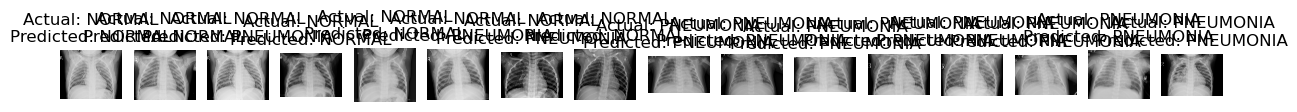

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Actual: NORMAL
Predicted: NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 775ms/step
Actual: NORMAL
Predicted: NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 718ms/step
Actual: NORMAL
Predicted: PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 817ms/step
Actual: NORMAL
Predicted: NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Actual: NORMAL
Predicted: NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 904ms/step
Actual: NORMAL
Predicted: PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Actual: NORMAL
Predicted: PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 726ms/step
Actual: NORMAL
Predicted: NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 689ms/step
Actual: PNEUMONIA
Predicted: PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 777ms/step
Actual: PNEUMONIA
Predicted: PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 668ms/step
Actual: PNEUMONIA
Predicted: PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 852ms/step
Actual: PNEUMONIA
Predicted: PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 798ms/step
Actual: PNEUMONIA


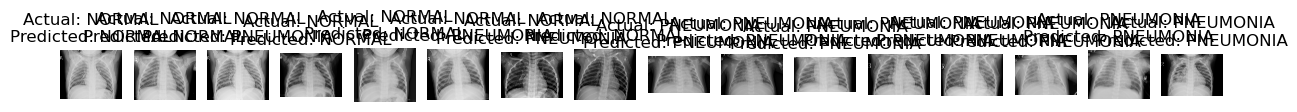

Total NORMAL images: 8
Total PNEUMONIA images: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 777ms/step
Actual: NORMAL
Predicted: NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 761ms/step
Actual: PNEUMONIA
Predicted: PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 831ms/step
Actual: NORMAL
Predicted: NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 804ms/step
Actual: NORMAL
Predicted: NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step
Actual: PNEUMONIA
Predicted: PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 768ms/step
Actual: PNEUMONIA
Predicted: PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 815ms/step
Actual: NORMAL
Predicted: PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 835ms/step
Actual: PNEUMONIA
Predicted: PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 844ms/step
Actual: NORMAL
Predicted: NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 821ms/step
Actual: PNEUMONIA
Predicted: PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step
Actual: PNEUMONIA
Predicted: PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 876ms/step
Actual: NORMAL
Predicted: PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 770ms/step
Actual

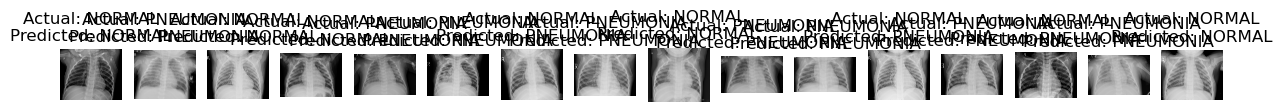

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 734ms/step
Actual: NORMAL
Predicted: NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 708ms/step
Actual: NORMAL
Predicted: PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 701ms/step
Actual: PNEUMONIA
Predicted: PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 738ms/step
Actual: PNEUMONIA
Predicted: PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 791ms/step
Actual: PNEUMONIA
Predicted: PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 830ms/step
Actual: PNEUMONIA
Predicted: PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 832ms/step
Actual: NORMAL
Predicted: NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 891ms/step
Actual: NORMAL
Predicted: PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 835ms/step
Actual: NORMAL
Predicted: NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 740ms/step
Actual: NORMAL
Predicted: PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 834ms/step
Actual: PNEUMONIA
Predicted: PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 859ms/step
Actual: NORMAL
Predicted: NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 809ms/step
Actual: PNEUMONIA
Predicted: PNEUMONIA
1/1 ━━━━━━━━━━━━━━━

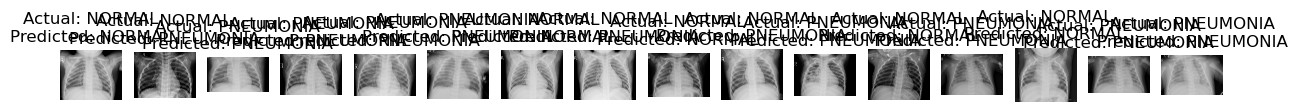

In [32]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define paths to the image categoriesimport os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define paths to the image categories
# Update this to your dataset path
dataset_path =r'extracted_dataset\chest_xray\val' # Change this to your dataset path
categories = ['NORMAL','PNEUMONIA']
num_classes = len(categories)

# Initialize lists to store image paths and labels
image_paths = []
actual_labels = []

# Count images in each folder and prepare paths and labels
for index, category in enumerate(categories):
    category_path = os.path.join(dataset_path, category)
    images_list = os.listdir(category_path)
    image_count = len(images_list)
    print(f"Total {category} images: {image_count}")

    # Extend the lists with image paths and corresponding labels
    image_paths.extend([os.path.join(category_path, img) for img in images_list])
    actual_labels.extend([index] * image_count)  # Assign labels based on the category index

# Function to display multiple sample images from a category with predictions
def display_samples(image_paths, actual_labels, model, num_samples=16):
    selected_indices = [i for i in range(16)]
    print(selected_indices)
    plt.figure(figsize=(15, 5))

    for i, idx in enumerate(selected_indices):
        img_path = image_paths[idx]
        img = cv2.imread(img_path)  # Read the image
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB format

        # Prepare the image for prediction
        img_resized = cv2.resize(img_rgb, (224, 224))  # Resize for model input
        img_array = np.expand_dims(img_resized, axis=0)  # Add batch dimension

        # Predict the label
        prediction = model.predict(img_array)
        predicted_label = np.argmax(prediction, axis=-1)[0]  # Get predicted class index
        actual_label = actual_labels[idx]  # Actual label

        plt.subplot(1, num_samples, i + 1)
        img_resized = cv2.resize(img_rgb, (100, 100)) 
        plt.imshow(img_rgb)
        print(f"Actual: {categories[actual_label]}\nPredicted: {categories[predicted_label]}")
        plt.title(f"Actual: {categories[actual_label]}\nPredicted: {categories[predicted_label]}")
        plt.axis('off')
    plt.show()

# Display 3 random sample images from each category
for category in categories:
    display_samples(image_paths, actual_labels, model)
# Update this to your dataset path
dataset_path =r'extracted_dataset\chest_xray\val' # Change this to your dataset path
categories = ['NORMAL','PNEUMONIA']
num_classes = len(categories)

# Initialize lists to store image paths and labels
image_paths = []
actual_labels = []

# Count images in each folder and prepare paths and labels
for index, category in enumerate(categories):
    category_path = os.path.join(dataset_path, category)
    images_list = os.listdir(category_path)
    image_count = len(images_list)
    print(f"Total {category} images: {image_count}")

    # Extend the lists with image paths and corresponding labels
    image_paths.extend([os.path.join(category_path, img) for img in images_list])
    actual_labels.extend([index] * image_count)  # Assign labels based on the category index

# Function to display multiple sample images from a category with predictions
def display_samples(image_paths, actual_labels, model, num_samples=16):
    
    selected_indices = np.random.choice(len(image_paths), num_samples, replace=False)
    plt.figure(figsize=(15, 5))

    for i, idx in enumerate(selected_indices):
        img_path = image_paths[idx]
        img = cv2.imread(img_path)  # Read the image
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB format

        # Prepare the image for prediction
        img_resized = cv2.resize(img_rgb, (224, 224))  # Resize for model input
        img_array = np.expand_dims(img_resized, axis=0)  # Add batch dimension

        # Predict the label
        prediction = model.predict(img_array)
        predicted_label = np.argmax(prediction, axis=-1)[0]  # Get predicted class index
        actual_label = actual_labels[idx]  # Actual label

        plt.subplot(1, num_samples, i + 1)
        img_resized = cv2.resize(img_rgb, (100, 100)) 
        plt.imshow(img_rgb)
        print(f"Actual: {categories[actual_label]}\nPredicted: {categories[predicted_label]}")
        plt.title(f"Actual: {categories[actual_label]}\nPredicted: {categories[predicted_label]}")
        plt.axis('off')
    plt.show()

# Display 3 random sample images from each category
for category in categories:
    display_samples(image_paths, actual_labels, model)